## Project Proposal

I would like to investigate air quality and snowfall patterns over time. My main question is: how is air pollution impacting annual snowfall at ski resorts (at least in Utah, but possibly other areas as well)? I will collect snowfall data from <a href="https://wcc.sc.egov.usda.gov/nwcc/snow-course-sites.jsp?state=UT">USDA Records for historcal snowfall</a>. I should be able to pull air quality data from <a href="https://aqs.epa.gov/aqsweb/documents/data_api.html">The EPA Air Quality System API</a>. Additional weather data may be available from <a href="https://www.ncei.noaa.gov/cdo-web/datasets">the NOAA</a>. I have already experimented collecting data from these sources. Some variables include: `latitude`, `longitude`, `date`, and `snow_depth`. There are also other variables that I will be able to collect. I am confident that the data I will be able to collect regarding snowfall and air quality will be sufficient to answer my question

In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import shapefile as shp

https://aqs.epa.gov/data/api/monitors/byCounty?email=test@aqs.api&key=test&param=42401&bdate=20150501&edate=20150502&state=49&county=001

List of Parameters (for the CRITERIA class): https://aqs.epa.gov/data/api/list/parametersByClass?email=davidyankura@gmail.com&key=bluebird41&pc=CRITERIA

List of Parameter Classes: https://aqs.epa.gov/data/api/list/classes?email=davidyankura@gmail.com&key=bluebird41

State Codes: https://aqs.epa.gov/data/api/list/states?email=davidyankura@gmail.com&key=bluebird41

County Codes for Utah: https://aqs.epa.gov/data/api/list/countiesByState?email=davidyankura@gmail.com&key=bluebird41&state=49

Sites for Utah County: https://aqs.epa.gov/data/api/list/sitesByCounty?email=davidyankura@gmail.com&key=bluebird41&state=49&county=035

Yearly Summary for Cottonwood Canyon in 1990: https://aqs.epa.gov/data/api/annualData/bySite?email=davidyankura@gmail.com&key=bluebird41&param=44201&bdate=19900618&edate=19900618&state=49&county=035&site=0003

### Import Data

https://www.ncdc.noaa.gov/cdo-web/search

In [2]:
df1 = pd.read_csv("Data/NOAA1.csv")
df2 = pd.read_csv("Data/NOAA2.csv")
df3 = pd.read_csv("Data/NOAA3.csv")
df4 = pd.read_csv("Data/NOAA4.csv")

In [3]:
df1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACSH,DAPR,DASF,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV07,WV20
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.shape

(55118, 42)

In [5]:
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2000-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2000-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2000-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2000-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2000-01-06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
62746,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2009-12-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62747,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2009-12-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62748,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2009-12-30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62749,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2009-12-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62750,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2010-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2.shape

(62751, 39)

In [8]:
df3.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,MDSF,PRCP,...,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22
0,USC00423097,"GARFIELD, UT US",40.7242,-112.1975,1310.0,2010-01-02,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00423097,"GARFIELD, UT US",40.7242,-112.1975,1310.0,2010-01-03,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00423097,"GARFIELD, UT US",40.7242,-112.1975,1310.0,2010-01-04,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00423097,"GARFIELD, UT US",40.7242,-112.1975,1310.0,2010-01-05,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00423097,"GARFIELD, UT US",40.7242,-112.1975,1310.0,2010-01-06,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df3.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,MDSF,PRCP,...,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22
113483,US1UTSL0083,"SANDY 1.1 NNE, UT US",40.585746,-111.849074,1436.8,2019-12-28,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113484,US1UTSL0083,"SANDY 1.1 NNE, UT US",40.585746,-111.849074,1436.8,2019-12-29,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113485,US1UTSL0083,"SANDY 1.1 NNE, UT US",40.585746,-111.849074,1436.8,2019-12-30,NaN,NaN,NaN,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113486,US1UTSL0083,"SANDY 1.1 NNE, UT US",40.585746,-111.849074,1436.8,2019-12-31,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113487,US1UTSL0083,"SANDY 1.1 NNE, UT US",40.585746,-111.849074,1436.8,2020-01-01,NaN,NaN,NaN,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df3.shape

(113488, 37)

In [11]:
df4.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11
0,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2020-01-02,NaN,NaN,0.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2020-01-03,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2020-01-04,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2020-01-05,NaN,NaN,0.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USS0011J65S,"MILL D NORTH, UT US",40.66,-111.64,2733.1,2020-01-06,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df4.shape

(34812, 27)

In [13]:
df1.columns.values

array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'ACMH', 'ACSH', 'DAPR', 'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WESD', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19',
       'WT21', 'WT22', 'WV07', 'WV20'], dtype=object)

### Join Data Frames

In [14]:
pd.concat([df1, df2, df3, df4], ignore_index=True).head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACSH,DAPR,DASF,...,WT16,WT17,WT18,WT19,WT21,WT22,WV07,WV20,WESF,TSUN
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df1.columns.values

array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'ACMH', 'ACSH', 'DAPR', 'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WESD', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19',
       'WT21', 'WT22', 'WV07', 'WV20'], dtype=object)

In [16]:
df2.columns.values

array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'DAPR', 'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'TOBS', 'WESD', 'WESF', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22'], dtype=object)

In [17]:
df3.columns.values

array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'DAPR', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'TOBS', 'TSUN', 'WESD', 'WESF', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT21', 'WT22'],
      dtype=object)

In [18]:
df4.columns.values

array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN',
       'TOBS', 'WESD', 'WESF', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT07', 'WT08', 'WT09', 'WT11'], dtype=object)

In [19]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WESF', 'WESD']]
df.shape

(266169, 14)

In [20]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,0.00,0.0,0.0,NaN,52.0,26.0,NaN,NaN
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,0.37,8.0,8.0,NaN,38.0,23.0,NaN,NaN
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,0.00,0.0,7.0,NaN,27.0,11.0,NaN,NaN
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,0.00,0.0,6.0,NaN,33.0,11.0,NaN,NaN
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,0.05,0.0,5.0,NaN,35.0,21.0,NaN,NaN


In [21]:
df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD
266164,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-11,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266165,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-12,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
266166,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-13,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
266167,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-14,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
266168,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-15,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Investigate NA Values

In [22]:
df['PRCP'].isna().sum() / len(df)

0.019698011413801005

In [23]:
df['SNOW'].isna().sum() / len(df)

0.4095405550608824

In [24]:
df['SNWD'].isna().sum() / len(df)

0.41070898564445896

In [25]:
df['TMAX'].isna().sum() / len(df)

0.4972329610134914

In [26]:
df['TMIN'].isna().sum() / len(df)

0.49808580262915664

In [27]:
df.groupby('STATION').mean().shape

/tmp/ipykernel_5465/3744774345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('STATION').mean().shape


(71, 11)

In [28]:
len(df['STATION'].unique())

71

In [29]:
precip = []

for station in df['STATION'].unique():
    precip.append(df[df['STATION'] == station]['PRCP'].isna().sum())

print(precip)

[260, 0, 104, 0, 0, 0, 113, 366, 30, 38, 0, 37, 0, 21, 4, 59, 244, 181, 428, 1, 2578, 0, 0, 1, 3, 38, 5, 37, 3, 0, 1, 0, 24, 1, 1, 1, 0, 0, 20, 0, 50, 112, 78, 147, 0, 1, 1, 0, 1, 24, 0, 1, 12, 5, 13, 0, 7, 24, 0, 69, 10, 1, 20, 23, 1, 5, 2, 26, 0, 11, 0]


In [30]:
snow = []

for station in df['STATION'].unique():
    snow.append(df[df['STATION'] == station]['SNOW'].isna().sum())

print(snow)

[1045, 12142, 454, 12142, 12142, 12142, 361, 975, 8612, 0, 8, 1624, 12142, 53, 1, 52, 119, 748, 663, 10409, 2578, 1, 218, 4, 522, 462, 459, 398, 1219, 66, 21, 484, 1220, 269, 394, 20, 193, 0, 455, 1, 1109, 355, 1016, 1091, 290, 24, 755, 578, 1019, 626, 609, 182, 124, 56, 1405, 31, 319, 446, 268, 205, 668, 405, 508, 181, 149, 474, 164, 29, 40, 1025, 38]


In [31]:
max_temp = []

for station in df['STATION'].unique():
    max_temp.append(df[df['STATION'] == station]['TMAX'].isna().sum())

print(max_temp)

[68, 5336, 4114, 4961, 4654, 5319, 91, 115, 2633, 99, 0, 4571, 6052, 5, 3, 124, 516, 3809, 255, 3638, 0, 139, 880, 5385, 1895, 1322, 1753, 784, 4371, 126, 115, 2105, 3043, 784, 1593, 229, 580, 167, 1653, 131, 5242, 1196, 4948, 4327, 1119, 251, 3589, 2727, 4207, 1102, 1399, 1414, 159, 349, 4665, 117, 456, 1970, 270, 80, 2401, 417, 3450, 437, 1330, 900, 1007, 4310, 247, 4627, 217]


### Separate DATE Into Year, Year-Month, and Year-Month-Day

In [32]:
dates = [datetime.fromisoformat(date) for date in df['DATE']]
dates[0].day

1

In [33]:
dates[0].month

1

In [34]:
dates[0].year

1990

In [35]:
type(dates[0])

datetime.datetime

In [36]:
df['DATE'] = dates
df['YEAR'] = [date.year for date in df['DATE']]
df['MONTH'] = [date.month for date in df['DATE']]
df['DAY'] = [date.day for date in df['DATE']]
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,0.00,0.0,0.0,NaN,52.0,26.0,NaN,NaN,1990,1,1
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,0.37,8.0,8.0,NaN,38.0,23.0,NaN,NaN,1990,1,2
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,0.00,0.0,7.0,NaN,27.0,11.0,NaN,NaN,1990,1,3
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,0.00,0.0,6.0,NaN,33.0,11.0,NaN,NaN,1990,1,4
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,0.05,0.0,5.0,NaN,35.0,21.0,NaN,NaN,1990,1,5


In [37]:
df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY
266164,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-11,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,5,11
266165,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-12,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021,5,12
266166,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-13,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021,5,13
266167,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-14,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021,5,14
266168,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-05-15,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2021,5,15


In [38]:
# November - March
# df[(df['MONTH'] == 11) or (df['MONTH'] == 12) or (df['MONTH'] == 1) or (df['MONTH'] == 2) or (df['MONTH'] == 3)]
df['Ski_Season'] = [(month == 11) or (month == 12) or (month == 1) or (month == 2) or (month == 3) for month in df['MONTH']]
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,0.00,0.0,0.0,NaN,52.0,26.0,NaN,NaN,1990,1,1,True
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,0.37,8.0,8.0,NaN,38.0,23.0,NaN,NaN,1990,1,2,True
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,0.00,0.0,7.0,NaN,27.0,11.0,NaN,NaN,1990,1,3,True
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,0.00,0.0,6.0,NaN,33.0,11.0,NaN,NaN,1990,1,4,True
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,0.05,0.0,5.0,NaN,35.0,21.0,NaN,NaN,1990,1,5,True


In [39]:
df['Snow_Season'] = [(month == 9) or (month == 10) or (month == 11) or (month == 12) or (month == 1) or (month == 2) or (month == 3) for month in df['MONTH']]

In [40]:
df.to_csv("Data/Utah_County_Weather.csv")

### Group By DATE and Then Average Data

In [41]:
df[df['TMAX'] > 200] # remove outlier 
df = df[df['TMAX'] != 663.0]

In [42]:
df_avg = df.groupby('DATE').mean(numeric_only=True)
df_avg.shape

(12142, 16)

In [43]:
df_avg.head(5)

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season,Snow_Season
DATE,,,,,,,,,,,,,,,,
1990-01-01,40.699355,-111.803425,1907.306667,0.028571,0.000000,4.500000,NaN,44.375000,23.125000,NaN,7.320000,1990.0,1.0,1.0,1.0,1.0
1990-01-02,40.699355,-111.803425,1907.306667,0.354000,3.566667,7.100000,NaN,40.666667,22.000000,NaN,6.766667,1990.0,1.0,2.0,1.0,1.0
1990-01-03,40.699355,-111.803425,1907.306667,0.077857,2.225000,8.222222,NaN,28.666667,7.888889,NaN,8.100000,1990.0,1.0,3.0,1.0,1.0
1990-01-04,40.699355,-111.803425,1907.306667,0.067333,0.000000,7.400000,NaN,30.666667,8.777778,NaN,8.220000,1990.0,1.0,4.0,1.0,1.0
1990-01-05,40.699355,-111.803425,1907.306667,0.078000,1.175000,7.900000,NaN,34.777778,19.222222,NaN,7.050000,1990.0,1.0,5.0,1.0,1.0


In [44]:
df_month = df.groupby(['YEAR', 'MONTH']).sum(numeric_only = True)[['PRCP', 'SNOW']]
df_month[['SNWD', 'TAVG', 'TMAX', 'TMIN', 'Ski_Season', 'Snow_Season']] = df.groupby(['YEAR', 'MONTH']).mean(numeric_only = True)[['SNWD', 'TAVG', 'TMAX', 'TMIN', 'Ski_Season', 'Snow_Season']]
df_month.head(24)

PRCP   SNOW       SNWD       TAVG       TMAX       TMIN  \
YEAR MONTH                                                             
1990 1      40.62  172.6   6.622711        NaN  41.627737  23.405109   
     2      30.93  163.8   8.119134        NaN  39.939516  22.016327   
     3      41.85  102.7   7.906137        NaN  53.408240  33.299625   
     4      34.13   18.7   5.114815  51.750000  63.117188  41.645914   
     5      30.40    9.5   1.600806  54.903226  66.356275  43.818548   
     6      18.19    0.0   0.000000  69.666667  83.681648  57.516854   
     7      15.13    0.0   0.000000  76.709677  88.667763  63.289474   
     8      12.28    0.0   0.000000  74.516129  85.910891  60.798680   
     9      22.16    0.0   0.000000  70.266667  81.400697  57.680556   
     10     22.93   10.0   0.125806  53.129032  64.220339  41.295918   
     11     45.28  105.0   1.841924  40.100000  50.021127  31.017668   
     12     31.65  174.4   6.098901  21.290323  31.718213  12.777397   
1991 1      32.62  114.2  10.922131  26.129032  33.996610  16.251701   
     2      22.65   36.6   6.515695  38.714286  47.340249  26.261411   
     3      45.59  115.5   8.857724  38.709677  49.134100  30.800000   
     4      72.65  159.8   7.538168  43.033333  55.243636  35.054348   
     5      43.47   29.0   5.093117  51.903226  63.695312  42.929688   
     6      16.17    0.0   0.000000  65.800000  77.529661  55.305085   
     7       6.58    0.0   0.000000  77.548387  88.967347  64.604082   
     8      27.30    0.0   0.000000  75.258065  87.210909  63.264925   
     9      36.52    0.0   0.000000  63.033333  73.824786  51.463830   
     10     38.84   60.8   0.715481  53.161290  63.861789  40.962963   
     11     61.04  155.9   4.263441  36.533333  44.793269  29.747573   
     12     13.06   73.9   5.663594  28.870968  36.460094  21.047170   

            Ski_Season  Snow_Season  
YEAR MONTH                           
1990 1             1.0          1.0  
     2             1.0          1.0  
     3             1.0          1.0  
     4             0.0          0.0  
     5             0.0          0.0  
     6             0.0          0.0  
     7             0.0          0.0  
     8             0.0          0.0  
     9             0.0          1.0  
     10            0.0          1.0  
     11            1.0          1.0  
     12            1.0          1.0  
1991 1             1.0          1.0  
     2             1.0          1.0  
     3             1.0          1.0  
     4             0.0          0.0  
     5             0.0          0.0  
     6             0.0          0.0  
     7             0.0          0.0  
     8             0.0          0.0  
     9             0.0          1.0  
     10            0.0          1.0  
     11            1.0          1.0  
     12            1.0          1.0

In [45]:
season_n = 1989

for year_month in df_month.index:
    df_month.loc[(year_month[0], year_month[1]), 'Season_Number'] = season_n
    # df_month_avg[year_month[0]][year_month[1]]['Season_Number'] = season_n
    if (year_month[1] == 3):
        season_n = season_n + 1

df_month.head(24)

PRCP   SNOW       SNWD       TAVG       TMAX       TMIN  \
YEAR MONTH                                                             
1990 1      40.62  172.6   6.622711        NaN  41.627737  23.405109   
     2      30.93  163.8   8.119134        NaN  39.939516  22.016327   
     3      41.85  102.7   7.906137        NaN  53.408240  33.299625   
     4      34.13   18.7   5.114815  51.750000  63.117188  41.645914   
     5      30.40    9.5   1.600806  54.903226  66.356275  43.818548   
     6      18.19    0.0   0.000000  69.666667  83.681648  57.516854   
     7      15.13    0.0   0.000000  76.709677  88.667763  63.289474   
     8      12.28    0.0   0.000000  74.516129  85.910891  60.798680   
     9      22.16    0.0   0.000000  70.266667  81.400697  57.680556   
     10     22.93   10.0   0.125806  53.129032  64.220339  41.295918   
     11     45.28  105.0   1.841924  40.100000  50.021127  31.017668   
     12     31.65  174.4   6.098901  21.290323  31.718213  12.777397   
1991 1      32.62  114.2  10.922131  26.129032  33.996610  16.251701   
     2      22.65   36.6   6.515695  38.714286  47.340249  26.261411   
     3      45.59  115.5   8.857724  38.709677  49.134100  30.800000   
     4      72.65  159.8   7.538168  43.033333  55.243636  35.054348   
     5      43.47   29.0   5.093117  51.903226  63.695312  42.929688   
     6      16.17    0.0   0.000000  65.800000  77.529661  55.305085   
     7       6.58    0.0   0.000000  77.548387  88.967347  64.604082   
     8      27.30    0.0   0.000000  75.258065  87.210909  63.264925   
     9      36.52    0.0   0.000000  63.033333  73.824786  51.463830   
     10     38.84   60.8   0.715481  53.161290  63.861789  40.962963   
     11     61.04  155.9   4.263441  36.533333  44.793269  29.747573   
     12     13.06   73.9   5.663594  28.870968  36.460094  21.047170   

            Ski_Season  Snow_Season  Season_Number  
YEAR MONTH                                          
1990 1             1.0          1.0         1989.0  
     2             1.0          1.0         1989.0  
     3             1.0          1.0         1989.0  
     4             0.0          0.0         1990.0  
     5             0.0          0.0         1990.0  
     6             0.0          0.0         1990.0  
     7             0.0          0.0         1990.0  
     8             0.0          0.0         1990.0  
     9             0.0          1.0         1990.0  
     10            0.0          1.0         1990.0  
     11            1.0          1.0         1990.0  
     12            1.0          1.0         1990.0  
1991 1             1.0          1.0         1990.0  
     2             1.0          1.0         1990.0  
     3             1.0          1.0         1990.0  
     4             0.0          0.0         1991.0  
     5             0.0          0.0         1991.0  
     6             0.0          0.0         1991.0  
     7             0.0          0.0         1991.0  
     8             0.0          0.0         1991.0  
     9             0.0          1.0         1991.0  
     10            0.0          1.0         1991.0  
     11            1.0          1.0         1991.0  
     12            1.0          1.0         1991.0

In [46]:
df_season = df_month.groupby(['Season_Number', 'Snow_Season'], as_index=False).mean()[['Season_Number', 'Snow_Season', 'TMAX', 'TMIN']]
df_season[['TOTAL_PRCP', 'TOTAL_SNOW']] = df_month.groupby(['Season_Number', 'Snow_Season'], as_index=False).sum()[['PRCP', 'SNOW']]
df_season['MAX_SNWD'] = df_month.groupby(['Season_Number', 'Snow_Season'], as_index=False).max()['SNWD']
df_season = df_season.rename(columns = {'TMAX':'AVERAGE_TMAX', 'TMIN':'AVERAGE_TMIN'})

df_season.head(20)

,Season_Number,Snow_Season,AVERAGE_TMAX,AVERAGE_TMIN,TOTAL_PRCP,TOTAL_SNOW,MAX_SNWD
0,1989.0,1.0,44.991831,26.240354,113.40,439.1,8.119134
1,1990.0,0.0,77.546753,53.413894,110.13,28.2,5.114815
2,1990.0,1.0,51.118762,30.869236,222.88,555.7,10.922131
3,1991.0,0.0,74.529373,52.231625,166.17,188.8,7.538168
4,1991.0,1.0,50.743336,32.612107,219.58,485.8,9.097297
5,1992.0,0.0,78.583881,54.820910,88.82,24.4,4.587500
6,1992.0,1.0,48.765785,30.532581,310.73,982.3,21.273109
7,1993.0,0.0,72.898559,49.586338,202.09,115.6,12.320197
8,1993.0,1.0,51.341993,31.976702,220.65,587.0,9.560185
9,1994.0,0.0,79.588755,55.314894,102.46,58.6,8.243478


In [47]:
df_year_avg = df_month.groupby('YEAR').mean()
df_year_avg['Season_Number'] = [int(sn) for sn in df_year_avg['Season_Number']]
df_year_avg

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Ski_Season,Snow_Season,Season_Number
YEAR,,,,,,,,,
1990,28.795833,63.058333,3.119186,56.925747,62.505803,40.713506,0.416667,0.583333,1989
1991,34.707500,62.141667,4.130779,49.891244,60.171480,39.807731,0.416667,0.583333,1990
1992,25.994167,48.175000,3.625012,51.457784,62.389194,41.654819,0.416667,0.583333,1991
1993,38.032500,78.733333,6.617084,47.887131,58.797465,38.303277,0.416667,0.583333,1992
1994,34.270000,80.925000,4.446333,52.409972,63.329567,42.328092,0.416667,0.583333,1993
1995,43.230833,63.533333,5.039458,51.108151,62.541851,41.512527,0.416667,0.583333,1994
1996,47.383333,120.841667,5.513126,51.570257,63.317108,39.668030,0.416667,0.583333,1995
1997,40.948333,73.233333,4.717611,49.362768,62.104997,39.197903,0.416667,0.583333,1996
1998,49.540833,92.775000,6.325508,57.889367,61.155845,39.626492,0.416667,0.583333,1997


### EDA

In [48]:
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)#assigning the coordinates
    df = df.assign(coords=shps)
    return df

In [49]:
# sf = shp.Reader("Data/Municipal_Boundaries/Municipal_Boundaries.shp")
sf = shp.Reader("Data/Utah Counties Shape File/geo_export_546606a9-09f3-4b61-b761-4b6fdfd7b4ad")

In [50]:
map_df = read_shapefile(sf)
map_df.head()

,color4,countynbr,entitynbr,entityyr,fips,fips_str,name,pop_curres,pop_lastce,shape_area,shape_leng,stateplane,coords
0,4.0,13,2.010131e+09,2010.0,25.0,49025,KANE,7125.0,7125.0,1.063156e+10,559368.836332,South,"[(-111.84535607956708, 37.535793459246364), (-..."
1,3.0,14,2.010141e+09,2010.0,27.0,49027,MILLARD,12503.0,12503.0,1.770867e+10,576258.300290,Central,"[(-112.23853741373898, 39.553627524771365), (-..."
2,2.0,20,2.010201e+09,2010.0,39.0,49039,SANPETE,27822.0,27822.0,4.146734e+09,317646.921218,Central,"[(-111.60346836528656, 39.81288329074635), (-1..."
3,1.0,04,2.010041e+09,2010.0,7.0,49007,CARBON,21403.0,21403.0,3.844122e+09,333190.055510,Central,"[(-111.05120318448016, 39.814065467688614), (-..."
4,3.0,25,2.010251e+09,2010.0,49.0,49049,UTAH,516564.0,516564.0,5.544906e+09,481098.235287,Central,"[(-111.59403772643259, 40.57706922199823), (-1..."


In [51]:
SL_df = map_df[map_df['name'] == 'SALT LAKE']
SL_df

,color4,countynbr,entitynbr,entityyr,fips,fips_str,name,pop_curres,pop_lastce,shape_area,shape_leng,stateplane,coords
26,4.0,18,2.010181e+09,2010.0,35.0,49035,SALT LAKE,1029655.0,1029655.0,2.085390e+09,232512.542449,Central,"[(-111.62271526112768, 40.752468595626375), (-..."


In [52]:
stations = df.groupby('STATION')[['LATITUDE', 'LONGITUDE']].mean(numeric_only=True)
lat = stations['LATITUDE']
lon = stations['LONGITUDE']

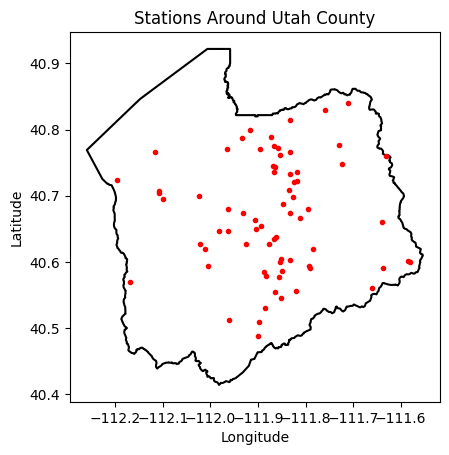

In [53]:
x = [i[0] for i in (sf.shapeRecords())[26].shape.points[:]]
y = [i[1] for i in (sf.shapeRecords())[26].shape.points[:]]
fig, ax = plt.subplots()
ax.plot(x, y, '-k')
ax.plot(lon, lat, '.r')

ratio = 1.0
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Stations Around Utah County")

fig.savefig("Figures/County_Map.jpg")

In [54]:
df_avg['PRCP'].isna().sum()

0

In [55]:
df_avg.mean()

LATITUDE         40.684163
LONGITUDE      -111.813693
ELEVATION      1868.133111
PRCP              0.080243
SNOW              0.295722
SNWD              9.673716
TAVG             46.145390
TMAX             58.143286
TMIN             37.375127
WESF              0.082860
WESD              6.900160
YEAR           2006.124609
MONTH             6.489788
DAY              15.726651
Ski_Season        0.418382
Snow_Season       0.584171
dtype: float64

In [56]:
# sns.stripplot(x="DATE", y="TMAX", data=df) # Not helpful because of influential point 

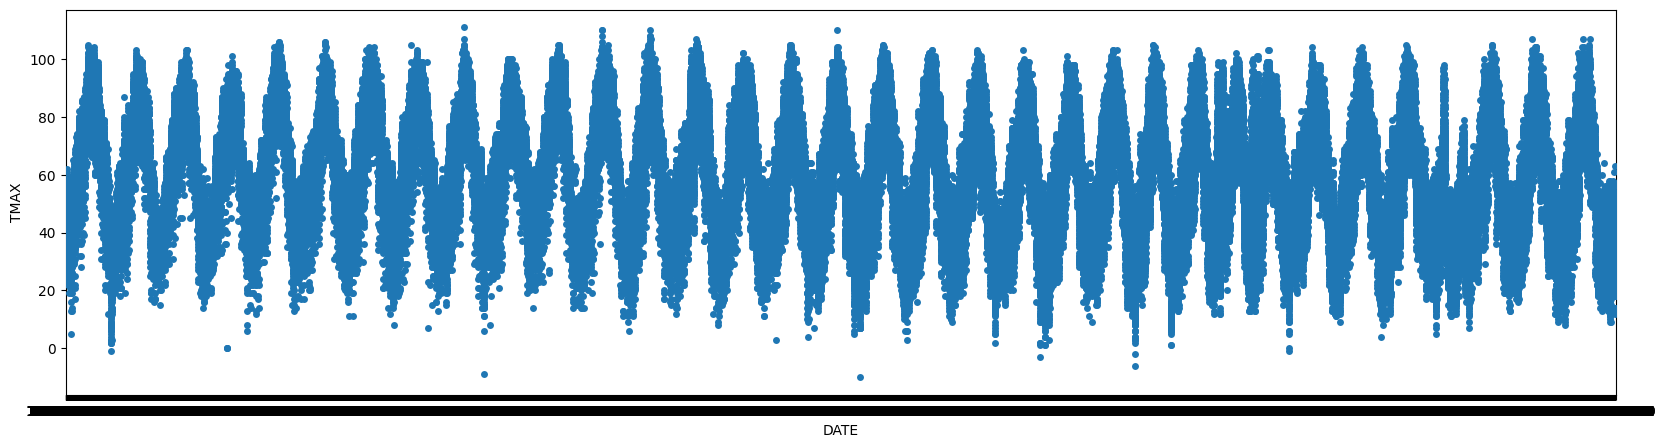

In [57]:
plt.figure(figsize=(20, 5))
sns.stripplot(x="DATE", y="TMAX", data=df)

plt.xlabel = "Date"
plt.ylabel = "Maximum Daily Temperature"
plt.title = "Daily High Temperatures"
plt.savefig("Figures/Daily_Maximum_Temperatures.jpg")

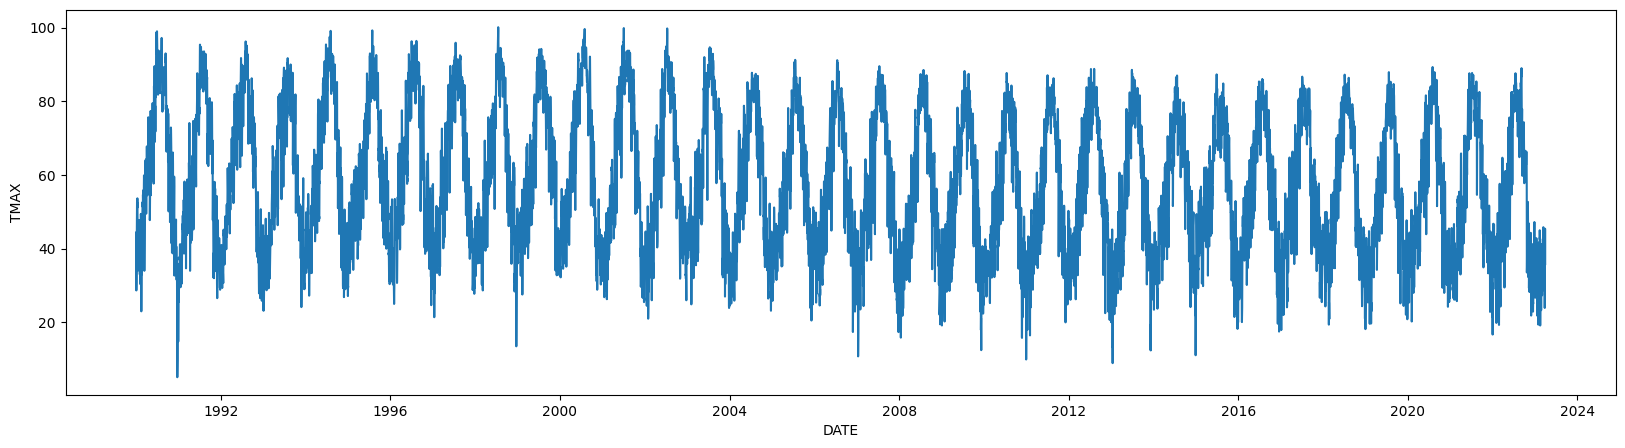

In [58]:
plt.figure(figsize = (20, 5))
sns.lineplot(x="DATE", y='TMAX', data=df_avg)

# plt.xlabel

plt.xlabel = "Date"
plt.ylabel = "Maximum Daily Average Temperature"
plt.title = "Daily High Temperatures (Average Amongst all Stations)"
plt.savefig("Figures/Daily_Average_Maximum_Temperatures.jpg")

In [59]:
# sns.lineplot(x='DATE', y='TMAX', hue='STATION', data=df)

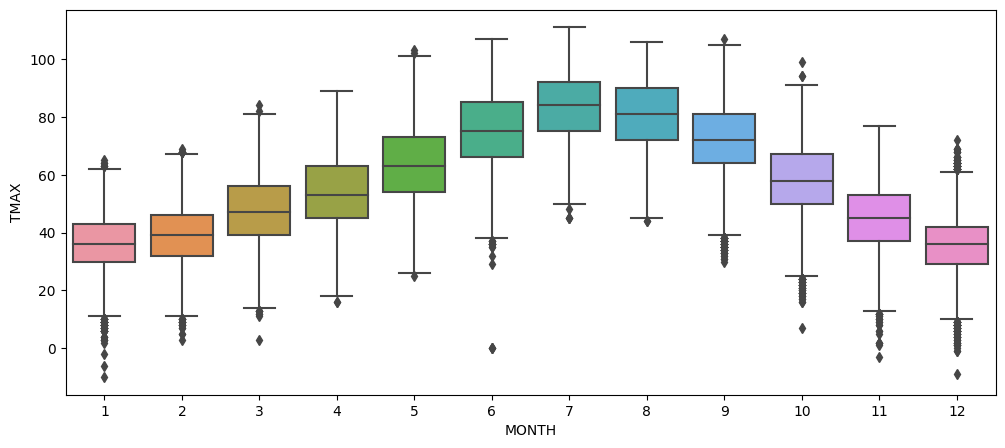

In [60]:

plt.figure(figsize = (12, 5))
sns.boxplot(x='MONTH', y='TMAX', data=df)

plt.xlabel = "Month (January - February)"
plt.ylabel = "Maximum Daily Temperature"
plt.title = "Distributions of Maximum Daily Temperature by Month"
plt.savefig("Figures/Maximum_Daily_Temps_By_Month.jpg")

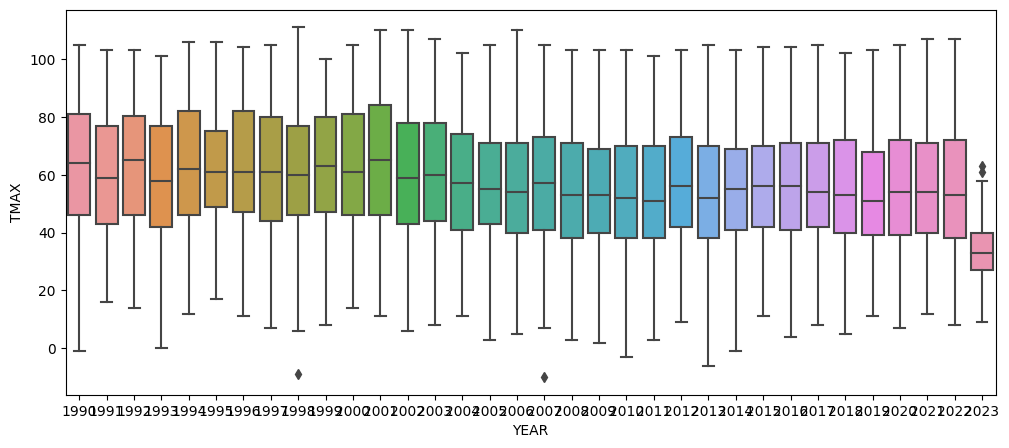

In [61]:
plt.figure(figsize = (12, 5))
sns.boxplot(x='YEAR', y='TMAX', data=df)

plt.xlabel = "Year"
plt.ylabel = "Maximum Daily Temperature"
plt.title = "Distributions of Maximum Daily Temperatures by Year"
plt.savefig("Figures/Maximum_Daily_Temps_By_Year.jpg")

In [62]:
# sns.boxplot(x='Season_Number', y='SNOW', data=)

In [63]:
df_year_avg.head()

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Ski_Season,Snow_Season,Season_Number
YEAR,,,,,,,,,
1990,28.795833,63.058333,3.119186,56.925747,62.505803,40.713506,0.416667,0.583333,1989
1991,34.707500,62.141667,4.130779,49.891244,60.171480,39.807731,0.416667,0.583333,1990
1992,25.994167,48.175000,3.625012,51.457784,62.389194,41.654819,0.416667,0.583333,1991
1993,38.032500,78.733333,6.617084,47.887131,58.797465,38.303277,0.416667,0.583333,1992
1994,34.270000,80.925000,4.446333,52.409972,63.329567,42.328092,0.416667,0.583333,1993


In [64]:
df_avg.head()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season,Snow_Season
DATE,,,,,,,,,,,,,,,,
1990-01-01,40.699355,-111.803425,1907.306667,0.028571,0.000000,4.500000,NaN,44.375000,23.125000,NaN,7.320000,1990.0,1.0,1.0,1.0,1.0
1990-01-02,40.699355,-111.803425,1907.306667,0.354000,3.566667,7.100000,NaN,40.666667,22.000000,NaN,6.766667,1990.0,1.0,2.0,1.0,1.0
1990-01-03,40.699355,-111.803425,1907.306667,0.077857,2.225000,8.222222,NaN,28.666667,7.888889,NaN,8.100000,1990.0,1.0,3.0,1.0,1.0
1990-01-04,40.699355,-111.803425,1907.306667,0.067333,0.000000,7.400000,NaN,30.666667,8.777778,NaN,8.220000,1990.0,1.0,4.0,1.0,1.0
1990-01-05,40.699355,-111.803425,1907.306667,0.078000,1.175000,7.900000,NaN,34.777778,19.222222,NaN,7.050000,1990.0,1.0,5.0,1.0,1.0


In [65]:
len(df.index)

266168

In [66]:
len(df['TMAX'])

266168

In [67]:
# sns.boxplot(x=df_avg.index, y="TMAX", data=df_avg) # Not helpful

<AxesSubplot: xlabel='DATE', ylabel='TMAX'>

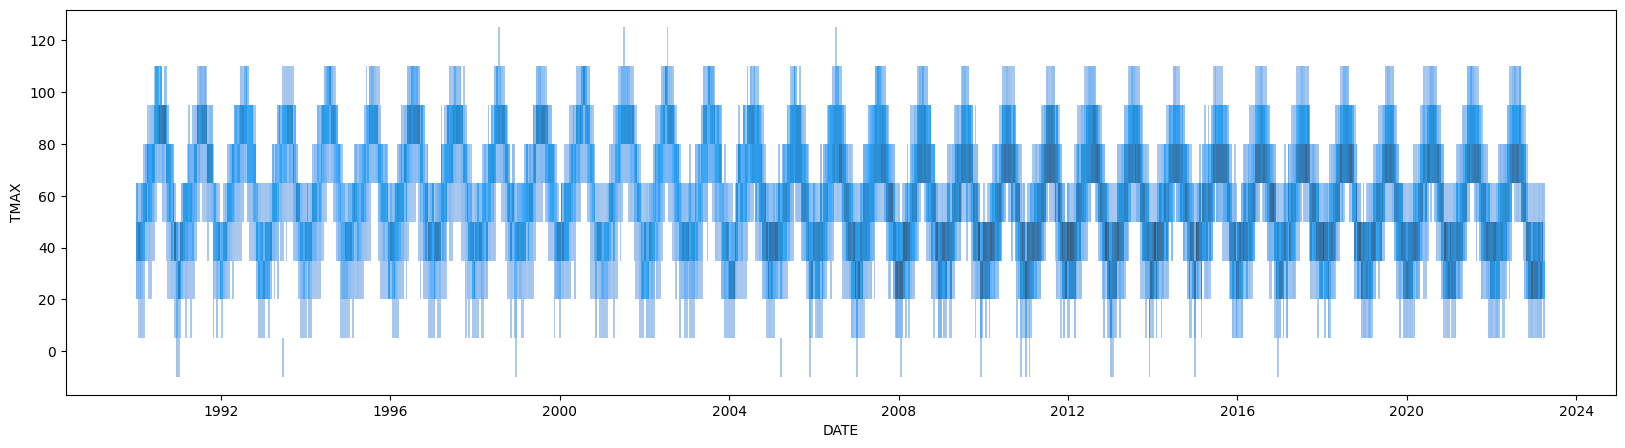

In [68]:
plt.figure(figsize = (20, 5))
sns.histplot(x="DATE", y="TMAX", data=df, binwidth=15)

In [69]:
df['TMAXGT100'] = df['TMAX'] > 100
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season,Snow_Season,TMAXGT100
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,0.00,0.0,0.0,NaN,52.0,26.0,NaN,NaN,1990,1,1,True,True,False
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,0.37,8.0,8.0,NaN,38.0,23.0,NaN,NaN,1990,1,2,True,True,False
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,0.00,0.0,7.0,NaN,27.0,11.0,NaN,NaN,1990,1,3,True,True,False
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,0.00,0.0,6.0,NaN,33.0,11.0,NaN,NaN,1990,1,4,True,True,False
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,0.05,0.0,5.0,NaN,35.0,21.0,NaN,NaN,1990,1,5,True,True,False


In [70]:
df[df['TMAX'] > 100]['TMAXGT100'].sum()

471

In [71]:
days_greater_than_100_by_year = df.groupby('YEAR')['TMAXGT100'].sum()
days_greater_than_100_by_year

YEAR
1990    19
1991     5
1992     5
1993     1
1994    38
1995    10
1996    17
1997     6
1998    20
1999     0
2000    37
2001    30
2002    45
2003    41
2004     2
2005    25
2006    18
2007    21
2008    13
2009     8
2010     1
2011     1
2012     7
2013    15
2014     2
2015     4
2016    11
2017     9
2018     1
2019     6
2020    12
2021    14
2022    27
2023     0
Name: TMAXGT100, dtype: int64

<AxesSubplot: xlabel='YEAR', ylabel='TMAXGT100'>

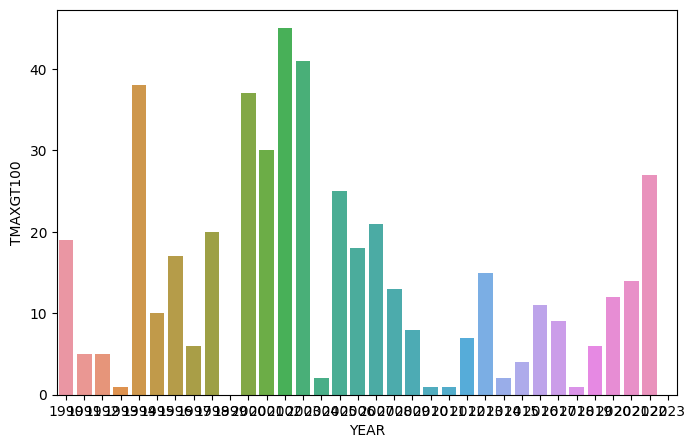

In [72]:
plt.figure(figsize = (8, 5))
sns.barplot(x=days_greater_than_100_by_year.index, y=days_greater_than_100_by_year)

In [79]:
Yearly_SUM_AVG_SNOW = df_month.groupby('Season_Number')['SNOW'].sum()
Yearly_SUM_AVG_SNOW

Season_Number
1989.0     439.1
1990.0     583.9
1991.0     674.6
1992.0    1006.7
1993.0     702.6
1994.0    1055.2
1995.0    1129.0
1996.0    1139.9
1997.0    1120.6
1998.0     833.8
1999.0     987.1
2000.0     765.4
2001.0    1163.0
2002.0     499.1
2003.0    1028.4
2004.0     741.8
2005.0     721.8
2006.0     503.8
2007.0     739.0
2008.0    1724.4
2009.0    1329.1
2010.0    3400.2
2011.0    2014.8
2012.0    2856.8
2013.0    1562.2
2014.0     966.7
2015.0    1822.1
2016.0    2139.4
2017.0    1721.2
2018.0    2389.1
2019.0    2026.2
2020.0    1497.1
2021.0    1535.8
2022.0    2974.2
Name: SNOW, dtype: float64

<AxesSubplot: xlabel='TMAXGT100', ylabel='SNOW'>

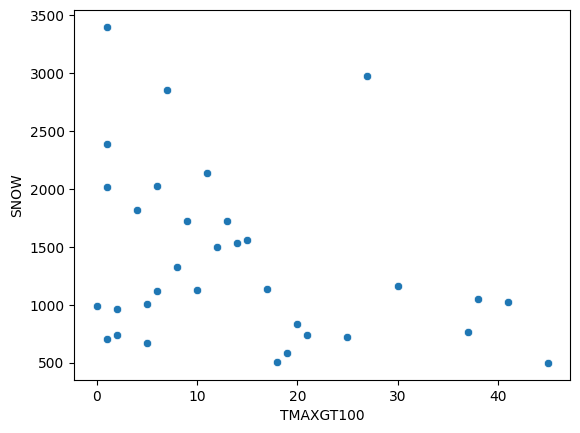

In [80]:
# plt.axis('equal')
# ratio = 1.0
# x_left, x_right = ax.get_xlim()
# y_low, y_high = ax.get_ylim()
# ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
# plt.figure(abs((x_right-x_left)/(y_low-y_high))*ratio)


sns.scatterplot(x=days_greater_than_100_by_year, y=Yearly_SUM_AVG_SNOW)

In [81]:
df['TMAXLT32'] = df['TMAX'] < 32
days_less_than_32_by_year = df.groupby('YEAR')['TMAXLT32'].sum()

<AxesSubplot: xlabel='TMAXGT100', ylabel='TMAXLT32'>

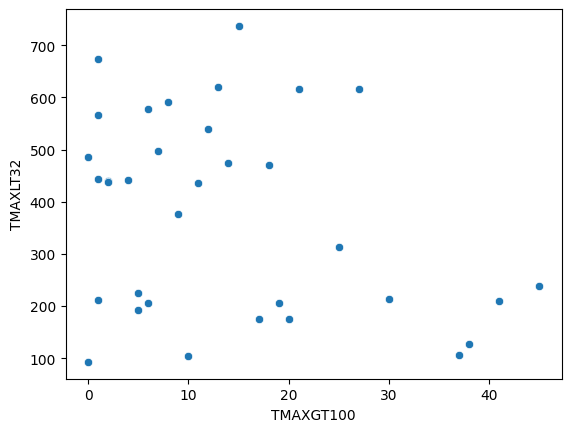

In [82]:
sns.scatterplot(x=days_greater_than_100_by_year, y=days_less_than_32_by_year, data=df)

The five core values are:
- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
- SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
- TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
- TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file

In [83]:
df.groupby(['YEAR', 'MONTH'])['PRCP'].sum()

YEAR  MONTH
1990  1         40.62
      2         30.93
      3         41.85
      4         34.13
      5         30.40
                ...  
2022  11        98.96
      12       122.86
2023  1        158.10
      2         77.36
      3        169.49
Name: PRCP, Length: 399, dtype: float64

In [84]:
df[df['PRCP'] != df['SNOW']][df['PRCP'] != 0]

/tmp/ipykernel_30021/1752082369.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['PRCP'] != df['SNOW']][df['PRCP'] != 0]


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,...,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season,Snow_Season,TMAXGT100,TMAXLT32
1,USC00421759,"COTTONWOOD WEIR, UT US",40.618900,-111.783600,1519.7,1990-01-02,0.37,8.0,8.0,NaN,...,23.0,NaN,NaN,1990,1,2,True,True,False,False
4,USC00421759,"COTTONWOOD WEIR, UT US",40.618900,-111.783600,1519.7,1990-01-05,0.05,0.0,5.0,NaN,...,21.0,NaN,NaN,1990,1,5,True,True,False,False
7,USC00421759,"COTTONWOOD WEIR, UT US",40.618900,-111.783600,1519.7,1990-01-08,0.13,0.0,1.0,NaN,...,21.0,NaN,NaN,1990,1,8,True,True,False,False
12,USC00421759,"COTTONWOOD WEIR, UT US",40.618900,-111.783600,1519.7,1990-01-13,0.01,0.0,0.0,NaN,...,39.0,NaN,NaN,1990,1,13,True,True,False,False
13,USC00421759,"COTTONWOOD WEIR, UT US",40.618900,-111.783600,1519.7,1990-01-14,0.13,0.0,0.0,NaN,...,37.0,NaN,NaN,1990,1,14,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266140,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-04-17,0.34,1.0,NaN,NaN,...,NaN,0.2,NaN,2021,4,17,False,False,False,False
266149,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-04-26,0.03,NaN,NaN,NaN,...,NaN,NaN,NaN,2021,4,26,False,False,False,False
266150,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-04-27,0.71,NaN,NaN,NaN,...,NaN,NaN,NaN,2021,4,27,False,False,False,False
266151,US1UTSL0060,"SANDY 2.0 ESE, UT US",40.556585,-111.820815,1478.9,2021-04-28,0.02,0.0,NaN,NaN,...,NaN,NaN,NaN,2021,4,28,False,False,False,False


In [85]:
df_avg.groupby('MONTH')['SNOW'].sum()

MONTH
1.0     716.659512
2.0     641.676092
3.0     501.981059
4.0     323.801859
5.0      87.506818
6.0      14.354323
7.0       0.000000
8.0       0.000000
9.0      10.925465
10.0    132.470718
11.0    455.651125
12.0    705.631716
Name: SNOW, dtype: float64

In [86]:
df_avg.groupby("MONTH")['PRCP'].sum()

MONTH
1.0     109.802698
2.0      96.653119
3.0     113.155353
4.0     117.452386
5.0      93.121879
6.0      45.825716
7.0      28.080086
8.0      39.224997
9.0      54.858138
10.0     81.215608
11.0     90.955263
12.0    103.962714
Name: PRCP, dtype: float64

In [87]:
df.groupby("MONTH")['TMAXGT100'].sum()

MONTH
1       0
2       0
3       0
4       0
5       4
6      51
7     329
8      81
9       6
10      0
11      0
12      0
Name: TMAXGT100, dtype: int64

In [88]:
df.groupby("MONTH")['TMAXLT32'].sum()

MONTH
1     3427
2     2532
3     1056
4      360
5       38
6        4
7        0
8        0
9        3
10     220
11    1321
12    3873
Name: TMAXLT32, dtype: int64

In [89]:
# df_avg[df_avg['Ski_Season'] == True].groupby('YEAR')['SNOW'].sum()
df_avg.shape

(12142, 16)

# Season Exploration

In [90]:
df_season.head(10)

,Season_Number,Snow_Season,AVERAGE_TMAX,AVERAGE_TMIN,TOTAL_PRCP,TOTAL_SNOW,MAX_SNWD
0,1989.0,1.0,44.991831,26.240354,113.40,439.1,8.119134
1,1990.0,0.0,77.546753,53.413894,110.13,28.2,5.114815
2,1990.0,1.0,51.118762,30.869236,222.88,555.7,10.922131
3,1991.0,0.0,74.529373,52.231625,166.17,188.8,7.538168
4,1991.0,1.0,50.743336,32.612107,219.58,485.8,9.097297
5,1992.0,0.0,78.583881,54.820910,88.82,24.4,4.587500
6,1992.0,1.0,48.765785,30.532581,310.73,982.3,21.273109
7,1993.0,0.0,72.898559,49.586338,202.09,115.6,12.320197
8,1993.0,1.0,51.341993,31.976702,220.65,587.0,9.560185
9,1994.0,0.0,79.588755,55.314894,102.46,58.6,8.243478


<AxesSubplot: xlabel='AVERAGE_TMAX', ylabel='TOTAL_SNOW'>

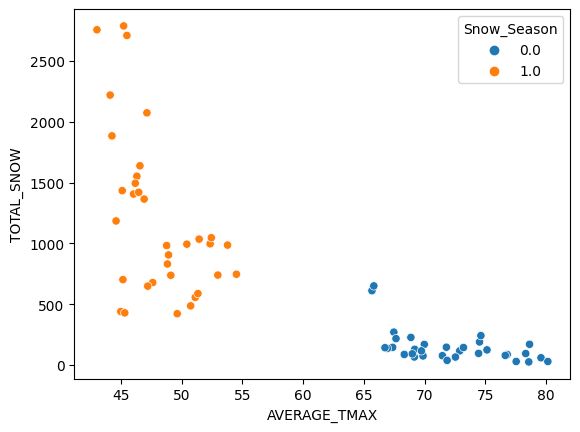

In [91]:
sns.scatterplot(df_season, x='AVERAGE_TMAX', y='TOTAL_SNOW', hue='Snow_Season')

<AxesSubplot: xlabel='AVERAGE_TMAX', ylabel='TOTAL_SNOW'>

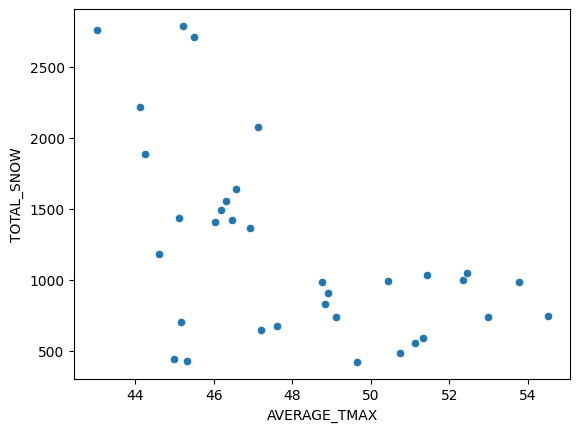

In [92]:
sns.scatterplot(df_season[df_season['Snow_Season'] == True], x="AVERAGE_TMAX", y='TOTAL_SNOW')

In [93]:
df_season[df_season['Snow_Season'] == False]


,Season_Number,Snow_Season,AVERAGE_TMAX,AVERAGE_TMIN,TOTAL_PRCP,TOTAL_SNOW,MAX_SNWD
1,1990.0,0.0,77.546753,53.413894,110.13,28.2,5.114815
3,1991.0,0.0,74.529373,52.231625,166.17,188.8,7.538168
5,1992.0,0.0,78.583881,54.820910,88.82,24.4,4.587500
7,1993.0,0.0,72.898559,49.586338,202.09,115.6,12.320197
9,1994.0,0.0,79.588755,55.314894,102.46,58.6,8.243478
11,1995.0,0.0,73.207288,50.705405,205.32,143.1,13.684211
13,1996.0,0.0,78.332033,51.053608,109.01,93.4,10.146341
15,1997.0,0.0,76.807000,50.888040,178.92,85.6,8.902985
17,1998.0,0.0,74.452083,49.961689,218.02,94.6,14.817241
19,1999.0,0.0,74.640439,50.539949,217.92,241.0,10.066246


In [94]:
df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]

/tmp/ipykernel_30021/151724016.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]


,Season_Number,Snow_Season,AVERAGE_TMAX,AVERAGE_TMIN,TOTAL_PRCP,TOTAL_SNOW,MAX_SNWD
2,1990.0,1.0,51.118762,30.869236,222.88,555.7,10.922131
4,1991.0,1.0,50.743336,32.612107,219.58,485.8,9.097297
6,1992.0,1.0,48.765785,30.532581,310.73,982.3,21.273109
8,1993.0,1.0,51.341993,31.976702,220.65,587.0,9.560185
10,1994.0,1.0,52.345146,33.825699,368.13,996.6,10.631148
12,1995.0,1.0,53.779097,32.964560,357.87,985.9,16.077778
14,1996.0,1.0,52.443988,31.260569,387.04,1046.5,11.280632
16,1997.0,1.0,51.439450,32.048471,390.41,1035.0,17.136667
18,1998.0,1.0,52.979010,32.218072,293.93,739.2,12.507299
20,1999.0,1.0,54.509691,33.212565,288.88,746.1,13.194175


In [95]:
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list(), 'Season_Number':[str(x) for x in range(1990 , 2023)]})
plot_df.head()

/tmp/ipykernel_30021/1830661838.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list(), 'Season_Number':[str(x) for x in range(1990 , 2023)]})


,x,y,Season_Number
0,77.546753,555.7,1990
1,74.529373,485.8,1991
2,78.583881,982.3,1992
3,72.898559,587.0,1993
4,79.588755,996.6,1994


<AxesSubplot: xlabel='x', ylabel='y'>

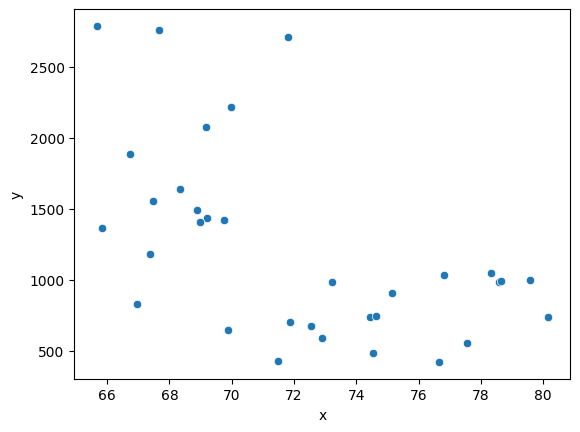

In [96]:
# x is average daily high temperature, and y is total snowfall for the season 
sns.scatterplot(data=plot_df, x='x', y='y')

In [97]:
# x is average TMIN, y is y is total snowfall 
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMIN'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})
plot_df.head()

/tmp/ipykernel_30021/593351176.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMIN'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})


,x,y
0,53.413894,555.7
1,52.231625,485.8
2,54.820910,982.3
3,49.586338,587.0
4,55.314894,996.6


<AxesSubplot: xlabel='x', ylabel='y'>

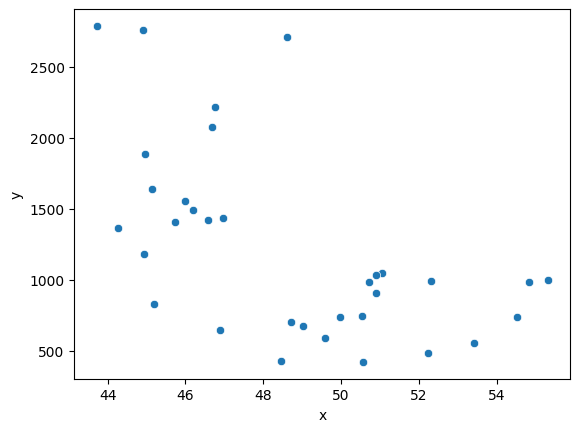

In [98]:
sns.scatterplot(data=plot_df, x='x', y='y')

In [99]:
# x is Total Precipitation over the summer, y is total snowfall in the following winter 
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['TOTAL_PRCP'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})
plot_df.head()

/tmp/ipykernel_30021/1336886478.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['TOTAL_PRCP'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})


,x,y
0,110.13,555.7
1,166.17,485.8
2,88.82,982.3
3,202.09,587.0
4,102.46,996.6


<AxesSubplot: xlabel='x', ylabel='y'>

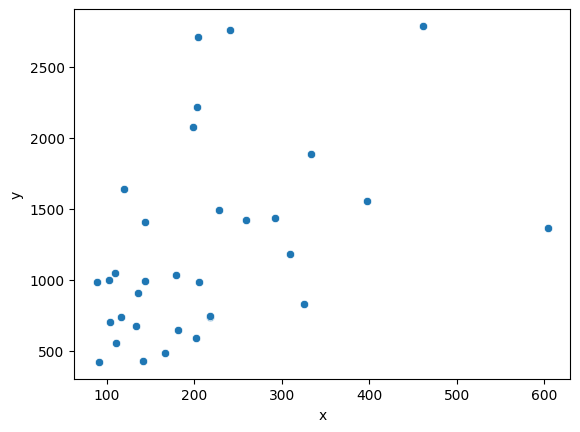

In [100]:
sns.scatterplot(data=plot_df, x='x', y='y')

In [101]:
df_season[df_season['TOTAL_SNOW'] > 1000]

,Season_Number,Snow_Season,AVERAGE_TMAX,AVERAGE_TMIN,TOTAL_PRCP,TOTAL_SNOW,MAX_SNWD
14,1996.0,1.0,52.443988,31.260569,387.04,1046.5,11.280632
16,1997.0,1.0,51.439450,32.048471,390.41,1035.0,17.136667
38,2008.0,1.0,46.564718,28.143899,520.88,1638.5,29.238124
40,2009.0,1.0,44.599863,26.683628,385.65,1184.6,25.273717
42,2010.0,1.0,45.225335,27.658024,777.86,2789.6,41.923427
44,2011.0,1.0,46.912858,28.654251,437.72,1364.8,25.271479
46,2012.0,1.0,45.492633,27.383849,497.38,2711.3,26.243680
48,2013.0,1.0,45.108052,27.443010,522.08,1434.1,30.266790
52,2015.0,1.0,46.312562,28.581972,503.37,1552.5,28.448824
54,2016.0,1.0,47.140212,28.909387,687.19,2074.4,38.716008


In [102]:
PERIOD = []
for season in df_season['Season_Number']:
    if season >= 2008:
        PERIOD.append(True)
    else:
        PERIOD.append(False)

df_season['PERIOD'] = PERIOD

/tmp/ipykernel_30021/1143209553.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list(), 'PERIOD':df_season[df_season['Snow_Season'] == False]['PERIOD']})


[Text(0.5, 0, 'Average Daily Maximum Temp'),
 Text(0, 0.5, 'Total Snowfall (averaged across all stations)')]

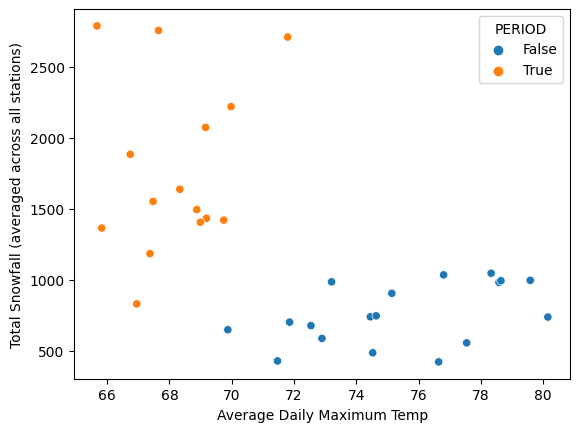

In [103]:
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list(), 'PERIOD':df_season[df_season['Snow_Season'] == False]['PERIOD']})
plot = sns.scatterplot(data=plot_df, x='x', y='y', hue='PERIOD')
plot.set(
    xlabel = "Average Daily Maximum Temp", 
    ylabel = "Total Snowfall (averaged across all stations)"
)

In [104]:
# len(df_season[df_season['Snow_Season'] == False]['Season_Number'].to_list())
# len(df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['AVERAGE_TMAX'].to_list())

/tmp/ipykernel_30021/1535070276.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'Year' : df_season[df_season['Snow_Season'] == False]['Season_Number'].to_list(), 'Average TMAX' : df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['AVERAGE_TMAX'].to_list()})


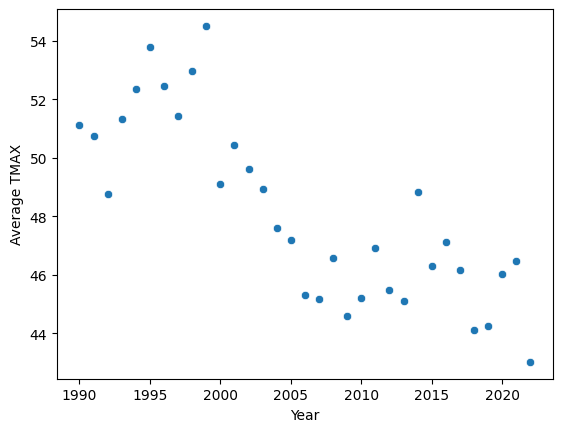

In [105]:
plot_df = pd.DataFrame({'Year' : df_season[df_season['Snow_Season'] == False]['Season_Number'].to_list(), 'Average TMAX' : df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['AVERAGE_TMAX'].to_list()})
plot = sns.scatterplot(data=plot_df, x='Year', y='Average TMAX')

/tmp/ipykernel_30021/3438596960.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'Year' : df_season[df_season['Snow_Season'] == False]['Season_Number'].to_list(), 'Total Snowfall' : df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})


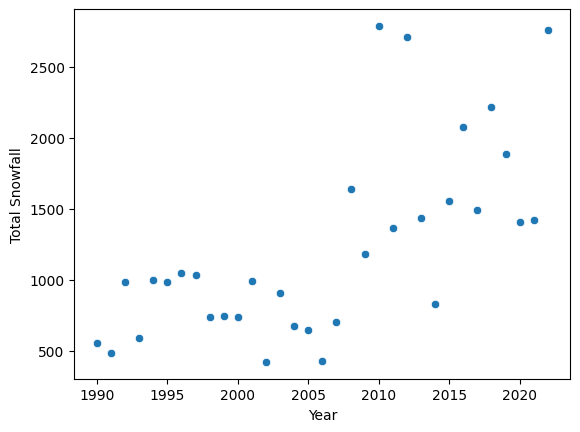

In [106]:
plot_df = pd.DataFrame({'Year' : df_season[df_season['Snow_Season'] == False]['Season_Number'].to_list(), 'Total Snowfall' : df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})
plot = sns.scatterplot(data=plot_df, x='Year', y='Total Snowfall')

# Repeat analysis with high altitude data

In [126]:
df['ELEVATION'].unique()

array([1519.7, 2733.1, 1627.6, 2286. , 2938.3, 2499.4, 1310. , 1652. ,
       2042.2, 1335. , 1288.4, 1566.1, 2667. , 1463. , 1283.2, 1478.3,
       1373.4, 1304.5, 2664. , 2161.9, 1709. , 1454.2, 1302.4, 1396. ,
       1550.8, 1316.7, 1404.5, 1439.3, 1366.1, 1349.7, 1410.3, 1399. ,
       1363.4, 1342. , 1316.4, 1442.3, 1322.5, 1725.8, 1535. , 1416.4,
       1413.4, 1409.4, 1594.1, 1392.3, 1394.5, 1382.3, 1311.6, 1315.8,
       1478.9, 1399.9, 1355.8, 1320.4, 1294.5, 1325. , 1309.4, 1399.3,
       1300.9, 1372.8, 2654.8, 1333.5, 1382. , 1400.3, 1403. , 1443.2,
       1349.3, 1330.5, 1358.2, 1286. , 1436.8, 1458.2])

In [127]:
df[df['ELEVATION'] >= 2000].groupby('NAME').mean()

/tmp/ipykernel_5465/2197866065.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['ELEVATION'] >= 2000].groupby('NAME').mean()


,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season,Snow_Season
NAME,,,,,,,,,,,,,,,,
"ALTA, UT US",40.59058,-111.63703,2654.8,0.154986,1.242007,35.123009,NaN,48.488841,29.519102,NaN,NaN,2016.208228,6.447679,15.715823,0.425105,0.588819
"BRIGHTON, UT US",40.60000,-111.58000,2667.0,0.113482,NaN,22.306311,39.184297,49.333005,30.214485,NaN,7.581428,2006.124609,6.489788,15.726651,0.418382,0.584171
"DRY FORK, UT US",40.57000,-112.17000,2161.9,0.089374,NaN,13.834036,43.443870,54.299808,34.421566,NaN,4.099971,2008.494092,6.523970,15.728792,0.421270,0.588433
"LOOKOUT PEAK, UT US",40.84000,-111.71000,2499.4,0.123168,NaN,27.204120,41.274527,50.259710,33.053681,NaN,8.907799,2006.124609,6.489788,15.726651,0.418382,0.584171
"LOUIS MEADOW, UT US",40.83000,-111.76000,2042.2,0.103356,NaN,14.552108,42.280482,53.860010,33.106557,NaN,5.042534,2010.953321,6.532397,15.726544,0.421389,0.591384
"MILL D NORTH, UT US",40.66000,-111.64000,2733.1,0.112634,NaN,22.832335,40.853888,49.419924,34.052477,NaN,7.945437,2006.124609,6.489788,15.726651,0.418382,0.584171
"PARLEY S SUMMIT, UT US",40.76000,-111.63000,2286.0,0.091863,NaN,14.693019,43.040245,52.639883,34.856645,NaN,4.202471,2006.124609,6.489788,15.726651,0.418382,0.584171
"SILVER LAKE BRIGHTON, UT US",40.60120,-111.58393,2664.0,0.113237,1.071273,25.953092,NaN,48.528855,26.086608,NaN,NaN,2006.069197,6.502377,15.727288,0.415690,0.585413
"SNOWBIRD, UT US",40.56000,-111.66000,2938.3,0.150560,NaN,38.815940,40.278432,47.667869,33.686162,NaN,14.635941,2006.124609,6.489788,15.726651,0.418382,0.584171


In [128]:
df_high = df[df['ELEVATION'] >= 2000]

In [129]:
df_high.groupby('NAME').min()[['YEAR', 'STATION']]

,YEAR,STATION
NAME,,
"ALTA, UT US",2010,USC00420072
"BRIGHTON, UT US",1990,USS0011J57S
"DRY FORK, UT US",1994,USS0012J09S
"LOOKOUT PEAK, UT US",1990,USS0011J64S
"LOUIS MEADOW, UT US",1999,USS0011J69S
"MILL D NORTH, UT US",1990,USS0011J65S
"PARLEY S SUMMIT, UT US",1990,USS0011J52S
"SILVER LAKE BRIGHTON, UT US",1990,USC00427846
"SNOWBIRD, UT US",1990,USS0011J42S


In [130]:
df_high = df_high[df_high['STATION'] != "USC00420072"][df_high['STATION'] != "USS0012J09S"][df_high['STATION'] != "USS0011J695"]

/tmp/ipykernel_5465/3492473415.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_high = df_high[df_high['STATION'] != "USC00420072"][df_high['STATION'] != "USS0012J09S"][df_high['STATION'] != "USS0011J695"]


In [131]:
df_month = df_high.groupby(['YEAR', 'MONTH']).sum(numeric_only = True)[['PRCP', 'SNOW']]
df_month[['SNWD', 'TAVG', 'TMAX', 'TMIN', 'Ski_Season', 'Snow_Season']] = df_high.groupby(['YEAR', 'MONTH']).mean(numeric_only = True)[['SNWD', 'TAVG', 'TMAX', 'TMIN', 'Ski_Season', 'Snow_Season']]
df_month.head(24)


PRCP  SNOW       SNWD  TAVG       TMAX       TMIN  Ski_Season  \
YEAR MONTH                                                                   
1990 1      31.77  84.0  47.000000   NaN  31.483871  10.129032         1.0   
     2      22.89  61.0  63.000000   NaN  28.464286   6.928571         1.0   
     3      23.90  57.0  67.290323   NaN  38.580645  18.548387         1.0   
     4      18.98  18.0  46.033333   NaN  46.766667  26.600000         0.0   
     5      18.90   9.0  12.806452   NaN  49.451613  28.677419         0.0   
     6       8.30   0.0        NaN   NaN        NaN        NaN         0.0   
     7       8.39   0.0   0.000000   NaN  72.451613  45.483871         0.0   
     8       6.52   0.0   0.000000   NaN  69.193548  44.161290         0.0   
     9      13.68   0.0   0.000000   NaN  65.133333  41.400000         0.0   
     10     15.06  10.0   1.258065   NaN  49.258065  28.000000         0.0   
     11     29.44  57.0  15.900000   NaN  37.866667  18.700000         1.0   
     12     24.14  32.5  29.933333   NaN  24.500000   2.000000         1.0   
1991 1      22.82  32.0  41.677419   NaN  29.677419   7.096774         1.0   
     2      16.24  30.0  46.035714   NaN  38.714286  15.464286         1.0   
     3      35.95  99.5  69.870968   NaN  31.645161  15.064516         1.0   
     4      40.95  77.5  63.200000   NaN  38.866667  19.500000         0.0   
     5      20.39  26.0  41.900000   NaN  47.677419  28.516129         0.0   
     6       7.00   0.0   0.000000   NaN  61.733333  38.600000         0.0   
     7       3.73   0.0   0.000000   NaN  71.838710  45.387097         0.0   
     8      17.87   0.0   0.000000   NaN  69.612903  45.161290         0.0   
     9      15.99   0.0   0.000000   NaN  61.166667  35.900000         0.0   
     10     20.50  41.0   4.645161   NaN  51.193548  26.806452         0.0   
     11     42.42  87.0  24.200000   NaN  34.000000  16.766667         1.0   
     12      9.45  23.5  31.709677   NaN  32.838710  11.161290         1.0   

            Snow_Season  
YEAR MONTH               
1990 1              1.0  
     2              1.0  
     3              1.0  
     4              0.0  
     5              0.0  
     6              0.0  
     7              0.0  
     8              0.0  
     9              1.0  
     10             1.0  
     11             1.0  
     12             1.0  
1991 1              1.0  
     2              1.0  
     3              1.0  
     4              0.0  
     5              0.0  
     6              0.0  
     7              0.0  
     8              0.0  
     9              1.0  
     10             1.0  
     11             1.0  
     12             1.0

In [132]:
season_n = 1989

for year_month in df_month.index:
    df_month.loc[(year_month[0], year_month[1]), 'Season_Number'] = season_n
    # df_month_avg[year_month[0]][year_month[1]]['Season_Number'] = season_n
    if (year_month[1] == 3):
        season_n = season_n + 1


In [133]:

df_month.head(24)
df_season = df_month.groupby(['Season_Number', 'Snow_Season'], as_index=False).mean()[['Season_Number', 'Snow_Season', 'TMAX', 'TMIN']]
df_season[['TOTAL_PRCP', 'TOTAL_SNOW']] = df_month.groupby(['Season_Number', 'Snow_Season'], as_index=False).sum()[['PRCP', 'SNOW']]
df_season['MAX_SNWD'] = df_month.groupby(['Season_Number', 'Snow_Season'], as_index=False).max()['SNWD']
df_season = df_season.rename(columns = {'TMAX':'AVERAGE_TMAX', 'TMIN':'AVERAGE_TMIN'})
df_season = df_season[df_season['Season_Number'] != 1989][df_season['Season_Number'] != 2022]

df_season.head(20)

/tmp/ipykernel_5465/1940577144.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_season = df_season[df_season['Season_Number'] != 1989][df_season['Season_Number'] != 2022]


,Season_Number,Snow_Season,AVERAGE_TMAX,AVERAGE_TMIN,TOTAL_PRCP,TOTAL_SNOW,MAX_SNWD
1,1990.0,0.0,59.465860,36.230645,61.09,27.0,46.033333
2,1990.0,1.0,39.542133,18.246511,157.33,261.0,69.870968
3,1991.0,0.0,57.945806,35.432903,89.94,103.5,63.200000
4,1991.0,1.0,41.000132,19.922824,136.09,251.5,51.935484
5,1992.0,0.0,62.595699,37.225161,57.66,24.0,36.700000
6,1992.0,1.0,39.675610,17.988530,204.17,373.0,84.161290
7,1993.0,0.0,57.838280,32.501720,123.49,100.0,83.300000
8,1993.0,1.0,39.268117,15.885953,150.39,270.5,66.903226
9,1994.0,0.0,63.983011,38.307527,60.93,52.0,63.133333
10,1994.0,1.0,39.344636,19.386429,231.77,423.0,81.645161


In [134]:
len(df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'])

32

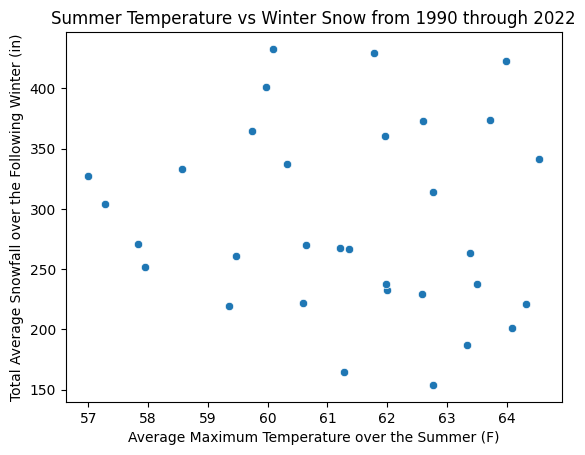

In [135]:
# x is average daily high temperature, and y is total snowfall for the season 
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True]['TOTAL_SNOW'].to_list()})
plot = sns.scatterplot(data=plot_df, x='x', y='y')
plot.set(
    xlabel = "Average Maximum Temperature over the Summer (F)", 
    ylabel = "Total Average Snowfall over the Following Winter (in)", 
    title = "Summer Temperature vs Winter Snow from 1990 through 2022"
)
plt.savefig("../my386blog/assets/images/Post_3c/Plot_Main.jpg")

/tmp/ipykernel_5465/2939744272.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMIN'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})


<AxesSubplot: xlabel='x', ylabel='y'>

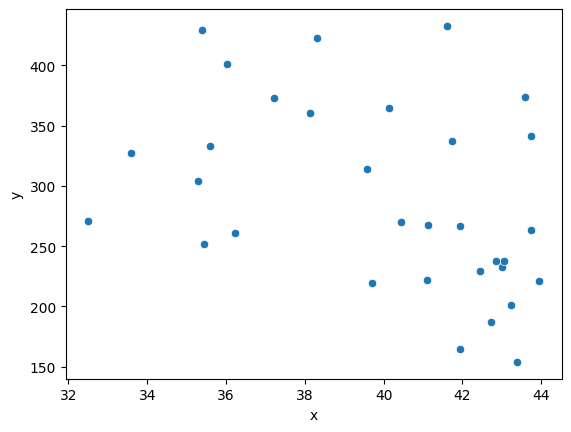

In [136]:
# x is average TMIN, y is total snowfall 
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMIN'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})
plot_df.head()
sns.scatterplot(data=plot_df, x='x', y='y')

/tmp/ipykernel_5465/2625021697.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['TOTAL_PRCP'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})


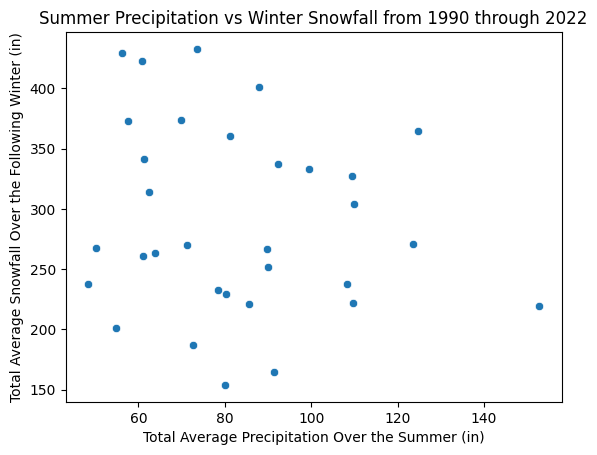

In [137]:
# x is Total Precipitation over the summer, y is total snowfall in the following winter 
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['TOTAL_PRCP'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list()})
plot = sns.scatterplot(data=plot_df, x='x', y='y')
plot.set(
    xlabel = "Total Average Precipitation Over the Summer (in)", 
    ylabel = "Total Average Snowfall Over the Following Winter (in)", 
    title = "Summer Precipitation vs Winter Snowfall from 1990 through 2022"
)

plt.savefig("../my386blog/assets/images/Post_3c/Side_Fig.jpg")

/tmp/ipykernel_5465/1601508100.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list(), 'PERIOD':df_season[df_season['Snow_Season'] == False]['PERIOD']})


[Text(0.5, 0, 'Average Daily Maximum Temp'),
 Text(0, 0.5, 'Total Snowfall (averaged across all stations)')]

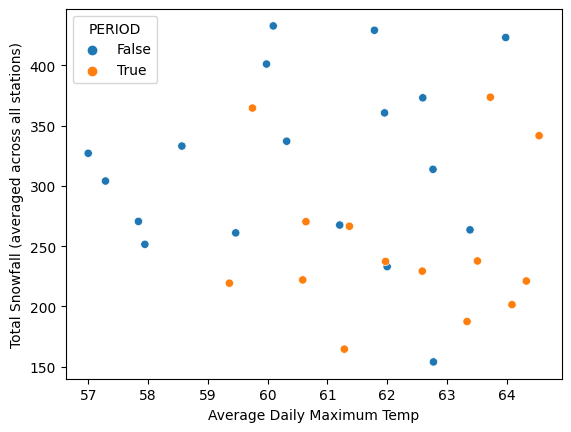

In [138]:
PERIOD = []
for season in df_season['Season_Number']:
    if season >= 2008:
        PERIOD.append(True)
    else:
        PERIOD.append(False)

df_season['PERIOD'] = PERIOD
plot_df = pd.DataFrame({'x':df_season[df_season['Snow_Season'] == False]['AVERAGE_TMAX'].to_list(), 'y':df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] != 1989]['TOTAL_SNOW'].to_list(), 'PERIOD':df_season[df_season['Snow_Season'] == False]['PERIOD']})
plot = sns.scatterplot(data=plot_df, x='x', y='y', hue='PERIOD')
plot.set(
    xlabel = "Average Daily Maximum Temp", 
    ylabel = "Total Snowfall (averaged across all stations)"
)

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Average Maximum Temperature')]

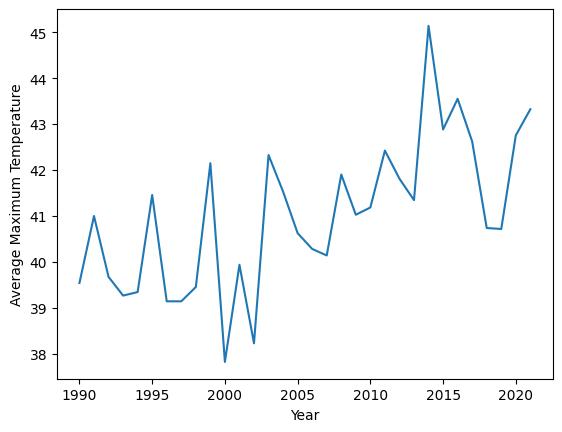

In [139]:
plot_df = pd.DataFrame({'Year' : df_season[df_season['Snow_Season'] == True]['Season_Number'].to_list(), 'Average TMAX' : df_season[df_season['Snow_Season'] == True]['AVERAGE_TMAX'].to_list()})
plot = sns.lineplot(data=plot_df, x='Year', y='Average TMAX')
plot.set(
    xlabel = "Year", 
    ylabel = "Average Maximum Temperature"
)

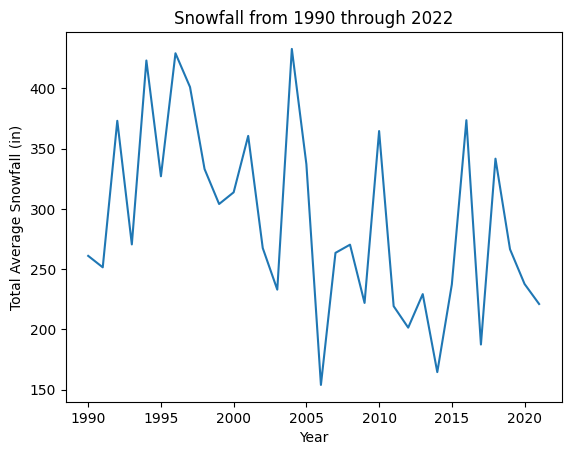

In [140]:
plot_df = pd.DataFrame({'Year' : df_season[df_season['Snow_Season'] == False]['Season_Number'].to_list(), 'Total Snowfall' : df_season[df_season['Snow_Season'] == True]['TOTAL_SNOW'].to_list()})
plot = sns.lineplot(data=plot_df, x='Year', y='Total Snowfall')
plot.set(
    xlabel = "Year", 
    ylabel = "Total Average Snowfall (in)", 
    title = "Snowfall from 1990 through 2022"
)

plt.savefig("../my386blog/assets/images/Post_3c/third_fig.jpg")

In [141]:
# x is previous season's snow, y is season's snow
x = df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] >= 1990][df_season['Season_Number'] <= 2021]['TOTAL_SNOW'].to_list() # Previous Season
y = df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] >= 1991]['TOTAL_SNOW'].to_list() # Y

plot_df = pd.DataFrame({'Previous Season\'s Total Snow':x, 'Season Total Snow':y})
plot_df.head()
sns.scatterplot(data=plot_df, x='Previous Season\'s Total Snow', y='Season Total Snow')

/tmp/ipykernel_5465/2079602453.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] >= 1990][df_season['Season_Number'] <= 2021]['TOTAL_SNOW'].to_list() # Previous Season
/tmp/ipykernel_5465/2079602453.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_season[df_season['Snow_Season'] == True][df_season['Season_Number'] >= 1991]['TOTAL_SNOW'].to_list() # Y


ValueError: All arrays must be of the same length

In [ ]:
df.groupby('NAME').mean(numeric_only=True)['YEAR']

NAME
ALTA, UT US                          2016.208228
BRIGHTON, UT US                      2006.124609
CITY CREEK WATER PLANT, UT US        2006.084484
COTTONWOOD HEIGHTS 1.3 WSW, UT US    2010.000000
COTTONWOOD HEIGHTS 1.5 SE, UT US     2014.476263
                                        ...     
WEST JORDAN 1.6 NNW, UT US           2008.314410
WEST JORDAN 2.4 NW, UT US            2022.387097
WEST JORDAN 3.5 NE, UT US            2009.858621
WEST VALLEY CITY 2.5 ESE, UT US      2013.235057
WHEELER FARM, UT US                  1997.618672
Name: YEAR, Length: 70, dtype: float64

In [ ]:
np.mean(range(1990, 2023))

2006.0

In [ ]:
np.mean(range(2008, 2023))

2015.0

### Filter to COTTONWOOD Station

In [ ]:
df_COTTONWOOD = df[df['STATION'] == "USC00421759"]
df_COTTONWOOD.shape

(12016, 19)

In [ ]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESF,WESD,YEAR,MONTH,DAY,Ski_Season,Snow_Season
0,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-01,0.00,0.0,0.0,NaN,52.0,26.0,NaN,NaN,1990,1,1,True,True
1,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-02,0.37,8.0,8.0,NaN,38.0,23.0,NaN,NaN,1990,1,2,True,True
2,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-03,0.00,0.0,7.0,NaN,27.0,11.0,NaN,NaN,1990,1,3,True,True
3,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-04,0.00,0.0,6.0,NaN,33.0,11.0,NaN,NaN,1990,1,4,True,True
4,USC00421759,"COTTONWOOD WEIR, UT US",40.6189,-111.7836,1519.7,1990-01-05,0.05,0.0,5.0,NaN,35.0,21.0,NaN,NaN,1990,1,5,True,True


In [ ]:
df_COTTONWOOD['TAVG'].sum()

0.0

In [ ]:
df_COTTONWOOD['WESF'].sum()

0.0

In [ ]:
df_COTTONWOOD['WESD'].sum()

0.0

In [ ]:
df_COTTONWOOD = df_COTTONWOOD[['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']]
df_COTTONWOOD.shape

(12016, 6)

In [ ]:
df_COTTONWOOD.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
0,1990-01-01,0.00,0.0,0.0,52.0,26.0
1,1990-01-02,0.37,8.0,8.0,38.0,23.0
2,1990-01-03,0.00,0.0,7.0,27.0,11.0
3,1990-01-04,0.00,0.0,6.0,33.0,11.0
4,1990-01-05,0.05,0.0,5.0,35.0,21.0
